# Word Ladder 

Given two words (beginWord and endWord), and a dictionary's word list, find the length of shortest transformation sequence from beginWord to endWord, such that:

1. Only one letter can be changed at a time
2. Each transformed word must exist in the word list.

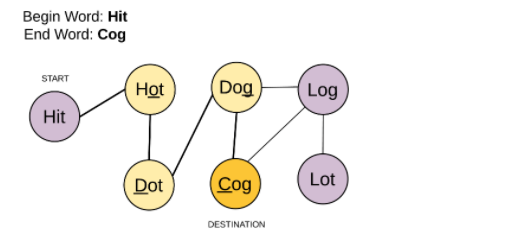

## Using BFS


In [1]:
import ipywidgets as widgets
from IPython.display import clear_output

In [2]:
import math

class Solution(object):
    '''function to check whether only 1 character is difference'''
    def check(self, word1, word2):
        same_num = 0
        for i in range(len(word1)):
            if word1[i] == word2[i]:
                same_num += 1
        if abs(same_num-len(word1)) == 1:
            return True
        else:
            return False

    '''find word sequence that reaches our end word'''
    def findLadders(self, beginWord, endWord, wordList):
        if endWord not in wordList:  # check whether word is in wordList. If not, exists directly
            return []
        self.result = []
        self.minlen = math.inf
        self.startfinding(beginWord, endWord, wordList, [])
        return self.result, self.minlen

    '''iteration function'''
    def startfinding(self, beginWord, endWord, wordList, temp):
        temp.append(beginWord)
        if beginWord == endWord:    # if begin word is our end word, break the iteration
            '''append the list if list's length are equal. Redefine if list's length is shorter than minimum list.'''
            if len(temp) == self.minlen:
                self.result.append(temp.copy())
            elif len(temp) < self.minlen:
                self.result = [temp.copy()]
                self.minlen = len(temp)

        else:
            if wordList:
                for item in wordList.copy():    # iteration
                    if self.check(beginWord, item):
                        index = wordList.index(item)
                        del wordList[index]
                        self.startfinding(item, endWord, wordList.copy(), temp)
                        temp.pop()

In [3]:
beginWord = widgets.Dropdown(
    options = [("Hit"), ("Hot"), ("Dot"), ("Dog"), ("Lot"), ("Log"), ("Cog")],
    disabled = False,
)

endWord = widgets.Dropdown(
    options = [("Hit"), ("Hot"), ("Dot"), ("Dog"), ("Lot"), ("Log"), ("Cog")],
    disabled = False,
)

output_Ladders = widgets.Output()

button_Find_Ladders = widgets.Button(description="Find_Ladders")

def on_button_Find_Ladders_clicked(b):
    wordList = ["Hit", "Hot", "Dot", "Dog", "Lot", "Log", "Cog"]
    ladders, minlen = Solution().findLadders(beginWord.value, endWord.value, wordList)
    with output_Ladders:
        clear_output(True)
        print(f"Minimum Ladder Length: {minlen}")
        print("\nPossible Ladders:")
        for index, ladder in enumerate(ladders):
            print(f"Ladder {index} - {ladder}") 
            
button_Find_Ladders.on_click(on_button_Find_Ladders_clicked)

In [4]:
display(beginWord)
display(endWord)
display(button_Find_Ladders)
display(output_Ladders)

Dropdown(options=('Hit', 'Hot', 'Dot', 'Dog', 'Lot', 'Log', 'Cog'), value='Hit')

Dropdown(options=('Hit', 'Hot', 'Dot', 'Dog', 'Lot', 'Log', 'Cog'), value='Hit')

Button(description='Find_Ladders', style=ButtonStyle())

Output()